In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
from numpy import where

In [2]:
# import data
data = pd.read_csv("Corrupted2_20_small.csv")

In [3]:
data

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified
0,0,143.292953,127.939780,False
1,1,80.523981,81.891216,False
2,2,98.703222,168.490227,False
3,3,129.861942,117.817454,False
4,4,80.658517,793.977681,True
...,...,...,...,...
9995,9995,167.404367,111.930927,False
9996,9996,118.069964,1001.176680,True
9997,9997,116.545783,38.279239,False
9998,9998,129.807868,76.094646,False


In [4]:
data = data.drop('Unnamed: 0',axis=1)
data

,Mystery_Data_X,Mystery_Data_Y,Modified
0,143.292953,127.939780,False
1,80.523981,81.891216,False
2,98.703222,168.490227,False
3,129.861942,117.817454,False
4,80.658517,793.977681,True
...,...,...,...
9995,167.404367,111.930927,False
9996,118.069964,1001.176680,True
9997,116.545783,38.279239,False
9998,129.807868,76.094646,False


In [5]:
data=data.fillna(0)

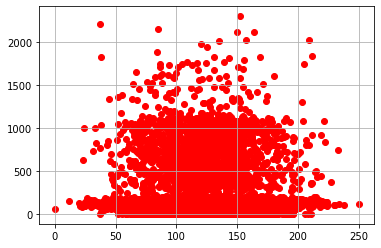

In [6]:
plt.scatter(data["Mystery_Data_X"], data["Mystery_Data_Y"], color = "r")
plt.grid()

In [7]:
df = data[["Mystery_Data_X", "Mystery_Data_Y"]].values

In [8]:
# model specification
model = EllipticEnvelope(contamination = 0.5)
model.fit(df)

EllipticEnvelope(contamination=0.5)

In [9]:
# prediction
y_pred = model.predict(df)

In [10]:
data['anomaly']=y_pred
data.head(20)

,Mystery_Data_X,Mystery_Data_Y,Modified,anomaly
0,143.292953,127.939780,False,1
1,80.523981,81.891216,False,-1
2,98.703222,168.490227,False,-1
3,129.861942,117.817454,False,1
4,80.658517,793.977681,True,-1
5,120.387921,940.524679,True,-1
6,128.735339,127.886463,False,1
7,112.396668,142.160446,False,1
8,140.698051,119.104152,False,1
9,103.234252,108.265453,False,1


In [11]:
outlier_idx = data.index[data.anomaly==-1]

In [12]:
outliers = outlier_idx

In [13]:
arr = data.index.isin(outliers)

In [14]:
arr

array([False,  True,  True, ...,  True, False, False])

In [15]:
data = pd.DataFrame(arr, columns =['Model'])

In [16]:
data

,Model
0,False
1,True
2,True
3,False
4,True
...,...
9995,False
9996,True
9997,True
9998,False


In [17]:
data.to_csv('check.csv')

In [18]:
import pandas as pd

In [19]:
read = pd.read_csv('/content/Corrupted2_20_small_EE.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,0,143.292953,127.939780,False,False,True
1,1,80.523981,81.891216,False,True,False
2,2,98.703222,168.490227,False,True,False
3,3,129.861942,117.817454,False,False,True
4,4,80.658517,793.977681,True,True,True
...,...,...,...,...,...,...
9995,9995,167.404367,111.930927,False,False,True
9996,9996,118.069964,1001.176680,True,True,True
9997,9997,116.545783,38.279239,False,True,False
9998,9998,129.807868,76.094646,False,False,True


In [20]:
l = len(read['CHECKING'])
l

10000

In [21]:
count = 0

In [22]:
for i in range(0,l):
  if(read['CHECKING'][i] == True):
    count = count + 1;

In [23]:
count

7211

In [24]:
accuracy = count/l

In [25]:
accuracy

0.7211

In [26]:
count1 = 0
count2 = 0

In [27]:
for i in range(0,l):
  if(read['Modified'][i] == True):
    count2 = count2 + 1
    if(read['Model'][i] == True):
      count1 = count1 + 1

In [28]:
count1

2211

In [29]:
count2

2211

In [30]:
acc = count1/count2

In [31]:
acc

1.0

In [32]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision 

0.4422

In [33]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity  

0.6419309282321223

In [34]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.6132297878241575

In [35]:
read = read.fillna(0)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(read)
X_pca = pca.transform(read)

In [37]:
import numpy as np

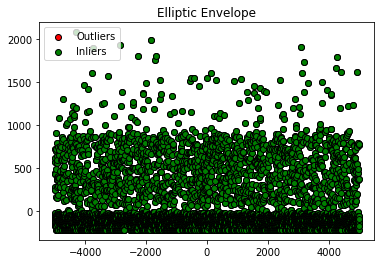

In [40]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Elliptic Envelope")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r',edgecolors='black',label="Outliers")
plt.scatter(values[:,0],values[:,1], color='green', edgecolors='black',label="Inliers")
plt.legend(loc="upper left")
plt.show()

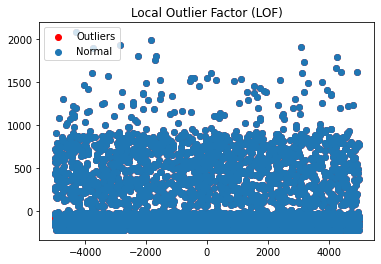

In [39]:
lofs_index = np.where(y_pred==-1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r', label="Outliers")
plt.scatter(values[:,0],values[:,1],label="Normal" )
plt.legend(loc="upper left")
plt.show()